In [1]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('dice_com-job_us_sample.csv')

In [4]:
df.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [5]:
df.describe(include='all')

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
count,22000,21950,21770,22000,22000,21997,22000,22000,21643,3490,21957,22000
unique,22000,4291,2927,20512,4415,1581,15242,93,20,1,18967,22000
top,https://www.dice.com/jobs/detail/Teradata-Deve...,CyberCoders,Full Time,Title IT Security Analyst – Threats and Vulner...,Dice Id : cybercod,"New York, NY",Java Developer,2 weeks ago,Telecommuting not available|Travel not required,www.dice.com,Telecommuting not available Travel not required,0210a6cb565141c2acde3aab867825c0
freq,1,335,6734,10,335,1368,174,3149,20305,3490,141,1


In [7]:
df.isnull().sum()

advertiserurl                   0
company                        50
employmenttype_jobstatus      230
jobdescription                  0
jobid                           0
joblocation_address             3
jobtitle                        0
postdate                        0
shift                         357
site_name                   18510
skills                         43
uniq_id                         0
dtype: int64

In [11]:
#lets drop some unimportant colums
df.drop(['advertiserurl','employmenttype_jobstatus','jobid','joblocation_address','shift','site_name','uniq_id'],axis=1,inplace=True)

In [12]:
df.isnull().sum()

company           50
jobdescription     0
jobtitle           0
postdate           0
skills            43
dtype: int64

In [13]:
#Skills are the target variables so we'll have to drop any rows with empty skills
df.dropna(subset=['skills'],axis = 0, inplace=True)

In [14]:
df.isnull().sum()

company           50
jobdescription     0
jobtitle           0
postdate           0
skills             0
dtype: int64

In [19]:
#Lets get the top 20 job titles in demand
top_20 = df['jobtitle'].value_counts().sort_values(ascending=False).head(20)

In [20]:
top_20.head()

Java Developer       174
Project Manager      145
Network Engineer     128
Software Engineer    118
Business Analyst     117
Name: jobtitle, dtype: int64

<AxesSubplot:title={'center':'Top 20 jobs in demand'}, xlabel='Job titles', ylabel='count'>

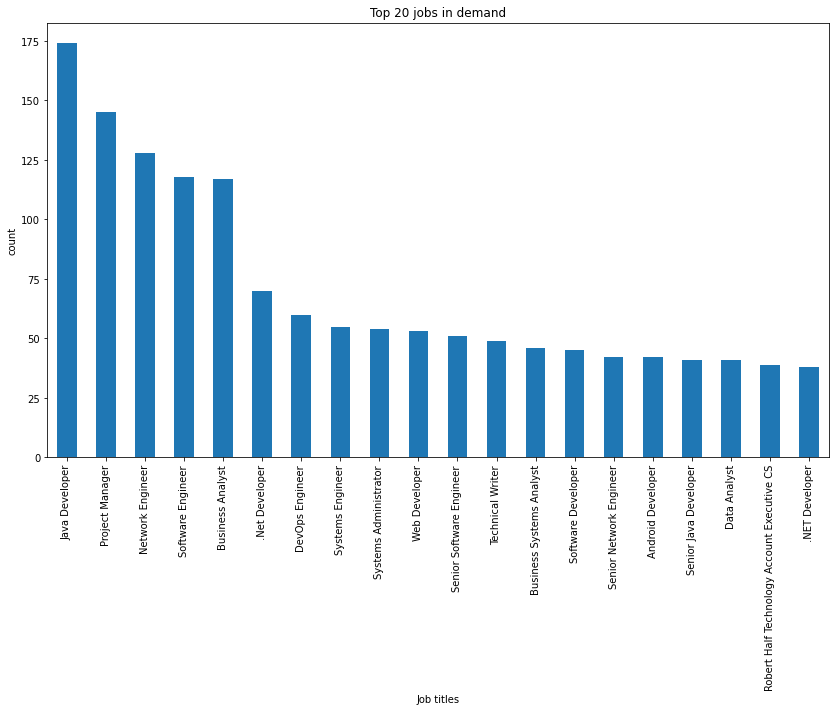

In [24]:
#Lets visualise the frequency of job titles with a bar chart
top_20.plot(kind = 'bar',figsize = (14,8),title = 'Top 20 jobs in demand',xlabel='Job titles',ylabel='count')


#Please note that the all these jobs are based on tech
#Now to repeat the same for skills involved
#df.drop(subset = (df['skills']=='Please see job description'),axis=0,inplace=True)
df()

In [31]:
!pip install wordcloud

In [35]:
df['skills']

0                                                SEE BELOW
1        linux/unix, network monitoring, incident respo...
2        Enterprise Solutions Architecture, business in...
3                               Please see job description
4        Configuration Management, Developer, Linux, Ma...
                               ...                        
21995    UI/UX mobile apps, interaction design, digital...
21996    JavaScript, HTML5, CSS3, Bootstrap, AJAX, Reac...
21997    SDLC, ALM, SQL, T-SQL, RedGate, Team Foundatio...
21998    Python, Ruby, Go, Clojure, Java, NoSQL-Databas...
21999                                                 Null
Name: skills, Length: 21957, dtype: object

In [45]:
a = df.loc[0,'skills']
a

'SEE BELOW'

In [47]:
b = df.loc[1,'skills']
b

'linux/unix, network monitoring, incident response, systems administration, security accessment'

In [62]:
df.replace('SEE BELOW',np.nan, inplace=True)
df.replace(regex = r'\s',value = '_',inplace = True)
df.replace('Please see job description', np.nan, inplace = True)
df.head()
df.dropna(subset=['skills'],axis=0, inplace=True)
df.shape

(21952, 5)

In [65]:
df['skills']

1        linux/unix,_network_monitoring,_incident_respo...
2        Enterprise_Solutions_Architecture,_business_in...
4        Configuration_Management,_Developer,_Linux,_Ma...
5                     FICO,_AR,_AP,_Asset_Management,_HAHA
6        Cisco,_DNS,_HTTP,_Networking,_Network_Engineer...
                               ...                        
21995    UI/UX_mobile_apps,_interaction_design,_digital...
21996    JavaScript,_HTML5,_CSS3,_Bootstrap,_AJAX,_Reac...
21997    SDLC,_ALM,_SQL,_T-SQL,_RedGate,_Team_Foundatio...
21998    Python,_Ruby,_Go,_Clojure,_Java,_NoSQL-Databas...
21999                                                 Null
Name: skills, Length: 21952, dtype: object

In [32]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

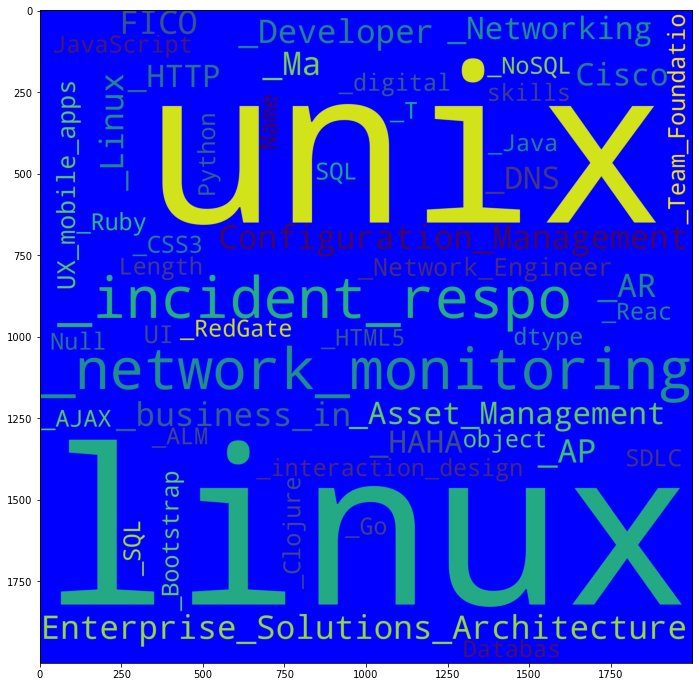

In [64]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'blue',max_words = 50, width = 2000, height = 2000).generate(str(df['skills']))
plt.title = 'Most frequently Demanded Jobs'
plt.rcParams['figure.figsize'] = (12, 12)
#plt.axis('off')
plt.imshow(wordcloud)
#plt.title('Most Demanded Preferred Requirements', fontsize = 30)
plt.show()

In [74]:
a = df.groupby('postdate')['postdate']
a.head()

1            1_week_ago
2           2_weeks_ago
4        48_minutes_ago
5           2_weeks_ago
6            1_hour_ago
              ...      
11415    43_minutes_ago
11423    43_minutes_ago
11428    43_minutes_ago
11606    56_minutes_ago
20717    32_minutes_ago
Name: postdate, Length: 463, dtype: object